In [ ]:
# plot summaries

In [2]:
library(ggplot2)
library(dplyr)

In [3]:
stages = c('E9-12', 'E12-17', 'E17-E19', 'P0-7', 'P7-14',
           'P14-28', 'P28-P56', 'P56-P75', 'P75-100')
freq = c(1, 3, 2, 2, 3, 3, 4, 5, 2)
df1 = data.frame(stage = stages, count = freq, id = 1:length(stages))
df1

stage   count id
1 E9-12   1     1 
2 E12-17  3     2 
3 E17-E19 2     3 
4 P0-7    2     4 
5 P7-14   3     5 
6 P14-28  3     6 
7 P28-P56 4     7 
8 P56-P75 5     8 
9 P75-100 2     9

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


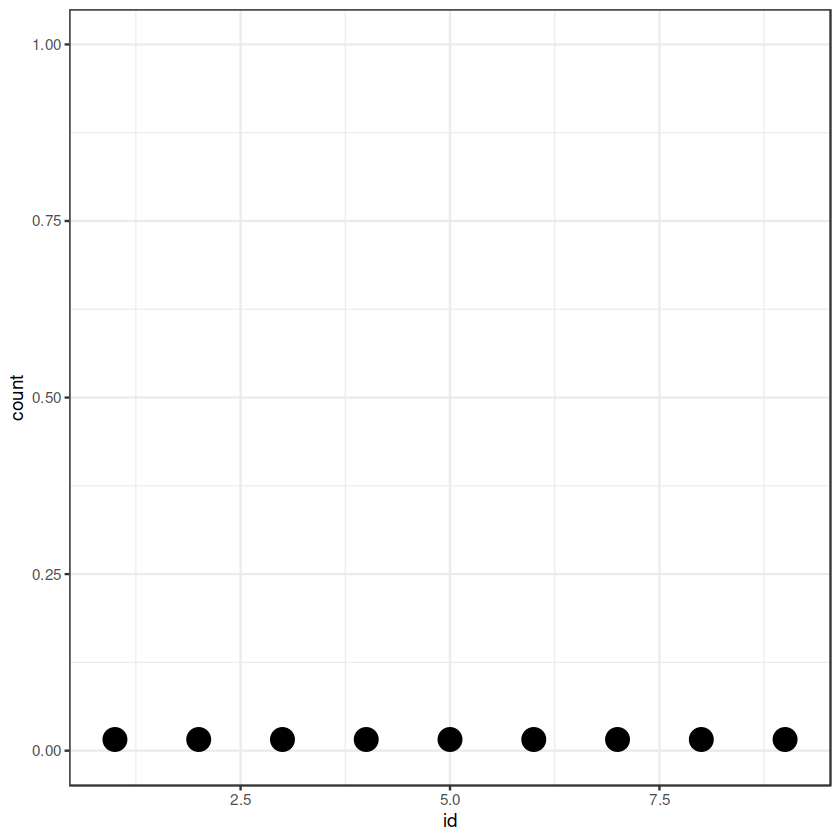

In [8]:
# pdf('aa-dotplot.pdf', width = 5, height = 5)
ggplot(df1, aes(id)) + geom_dotplot() + theme_bw()
# dev.off()

In [1]:
# load summary
tab1 = read.delim('dataset_summary.csv', sep = ',')

tab1$neurog2_A1N2 = tab1$Neurog2-tab1$A1N2
tab1$ascl1_A1N2 = tab1$Ascl1-tab1$A1N2

tab1$neurog2_N1N2 = tab1$Neurog2-tab1$N1N2
tab1$neurog1_N1N2 = tab1$Neurog1-tab1$N1N2

tab1[1,]

Study         Dataset num_cells Neurog2 Neurog1 Ascl1 A1N2 N1N2 retain_A1N2
1 Cebrian_Silla scseq   24261     117     11      937   54   5    yes        
  retain_N1N2 neurog2_A1N2 ascl1_A1N2 neurog2_N1N2 neurog1_N1N2
1 no          63           883        112          6

In [57]:
plotdf1 = data.frame(study = tab1$Study, v1 = tab1$A1N2*100/tab1$num_cells, 
                     v2 = tab1$neurog2_A1N2*100/tab1$num_cells,
                     v3 = tab1$ascl1_A1N2*100/tab1$num_cells)
plotdf1$other = 100-plotdf1$v1-plotdf1$v2-plotdf1$v3

plotdf1 <- plotdf1 %>% arrange(other)
study_order = unlist(plotdf1$study)
plotdf1

study         v1           v2         v3        other   
1  Hamed         20.423741653 29.5372172 28.674817 21.36422
2  Marcy          2.448018027  2.0024583 44.402335 51.14719
3  Yao_Cell       0.333591386  1.0880428 20.592582 77.98578
4  Govek          1.697599239 12.4222583  7.533763 78.34638
5  Tasic          0.263687151  0.8268156 18.534078 80.37542
6  La_Manno       1.740983130  8.6609627  7.679471 81.91858
7  Scala          0.020384534  0.2234145  6.333882 93.42232
8  Yao_Nature     0.028558275  0.2124637  6.275435 93.48354
9  Cebrian_Silla  0.222579448  0.2596760  3.639586 95.87816
10 Steuernagel    0.005195817  0.1236605  2.490355 97.38079
11 Zeisel         0.034204831  0.3109530  1.741337 97.91351

In [58]:
plotdf2 = data.frame(study = rep(plotdf1$study, 4), 
                     values = c(plotdf1$v1, plotdf1$v2, plotdf1$v3, plotdf1$other),
                    gtype = c(rep('dbl', length(study_order)), rep('neurog2', length(study_order)),
                             rep('ascl1', length(study_order)), rep('pro-', length(study_order))))

plotdf2$study = factor(plotdf2$study, levels = study_order)
plotdf2$gtype = factor(plotdf2$gtype, levels = rev(c('ascl1', 'neurog2', 'dbl', 'pro-')))
plotdf2[1:3,]

study    values     gtype
1 Hamed    20.4237417 dbl  
2 Marcy     2.4480180 dbl  
3 Yao_Cell  0.3335914 dbl

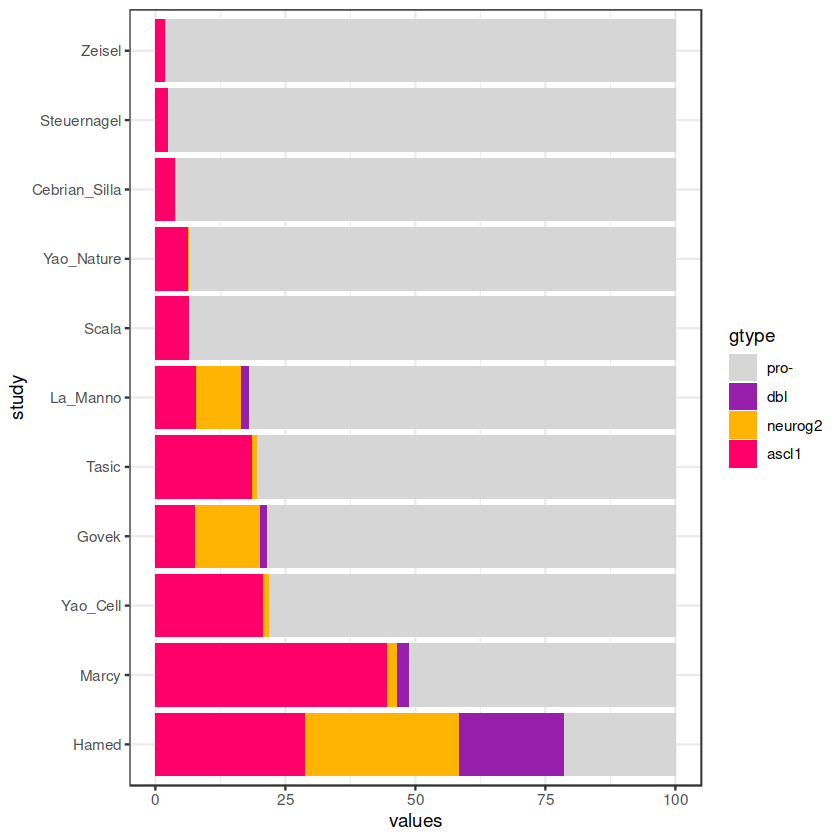

In [63]:
# pdf('aa-a1n2-freq.pdf', width = 5, height = 7)
ggplot(plotdf2, aes(y = study, x = values, fill = gtype)) + geom_bar(position = "stack", stat = "identity") +
theme_bw() + scale_fill_manual(values = c('#d6d6d6', '#981fac', '#ffb403', '#ff006a'))
# dev.off()

In [64]:
# for N1N2
tab2 = tab1[tab1$retain_N1N2=='yes',]

plotdf1 = data.frame(study = tab2$Study, v1 = tab2$N1N2*100/tab2$num_cells, 
                     v2 = tab2$neurog2_N1N2*100/tab2$num_cells,
                     v3 = tab2$neurog1_N1N2*100/tab2$num_cells)
plotdf1$other = 100-plotdf1$v1-plotdf1$v2-plotdf1$v3

plotdf1 <- plotdf1 %>% arrange(other)
study_order = unlist(plotdf1$study)
plotdf1

study    v1          v2        v3          other   
1 Hamed    25.33825912 24.622700 30.57909028 19.45995
2 Govek     0.70152119 13.418336  0.21086660 85.66928
3 La_Manno  2.18423729  8.217709  1.73204355 87.86601
4 Marcy     0.06145652  4.389020  0.04609239 95.50343

In [65]:
plotdf2 = data.frame(study = rep(plotdf1$study, 4), 
                     values = c(plotdf1$v1, plotdf1$v2, plotdf1$v3, plotdf1$other),
                    gtype = c(rep('dbl', length(study_order)), rep('neurog2', length(study_order)),
                             rep('neurog1', length(study_order)), rep('pro-', length(study_order))))

plotdf2$study = factor(plotdf2$study, levels = study_order)
plotdf2$gtype = factor(plotdf2$gtype, levels = rev(c('neurog2', 'neurog1', 'dbl', 'pro-')))
plotdf2

study    values      gtype  
1  Hamed    25.33825912 dbl    
2  Govek     0.70152119 dbl    
3  La_Manno  2.18423729 dbl    
4  Marcy     0.06145652 dbl    
5  Hamed    24.62269978 neurog2
6  Govek    13.41833637 neurog2
7  La_Manno  8.21770856 neurog2
8  Marcy     4.38901977 neurog2
9  Hamed    30.57909028 neurog1
10 Govek     0.21086660 neurog1
11 La_Manno  1.73204355 neurog1
12 Marcy     0.04609239 neurog1
13 Hamed    19.45995082 pro-   
14 Govek    85.66927583 pro-   
15 La_Manno 87.86601060 pro-   
16 Marcy    95.50343132 pro-

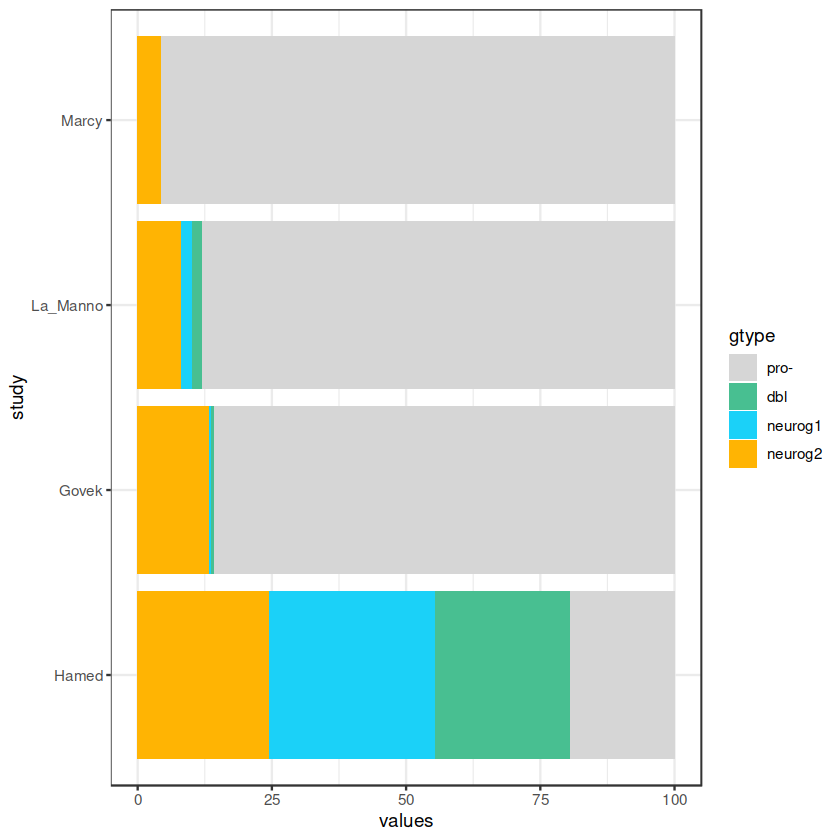

In [69]:
# pdf('aa-n1n2-freq.pdf', width = 5, height = 2.5)
ggplot(plotdf2, aes(y = study, x = values, fill = gtype)) + geom_bar(position = "stack", stat = "identity") +
theme_bw() + scale_fill_manual(values = c('#d6d6d6', '#48bf91', '#1bd1f8', '#ffb403'))
# dev.off()